In [3]:
import openai
import os

# AZURE CONNECTION # 
openai.api_type = "azure"
openai.api_version = "2023-05-15"
openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT")
openai.api_key = os.getenv("AZURE_OPENAI_KEY")

# def get_completion(prompt, model="gpt-3.5-turbo-0301", temperature=0): 
#     messages = [{"role": "user", "content": prompt}]
#     response = openai.ChatCompletion.create(
#         model=model,
#         messages=messages,
#         temperature=temperature, 
#     )
#     return response.choices[0].message["content"]

# for azure use engine 
# temperature 0 = reliable/predictable/reproducable response
def get_completion(prompt, model="MyChatGPT35Turbo", temperature=0):  
    # The deployment name you chose when you deployed the ChatGPT or GPT-4 model.
    response = openai.ChatCompletion.create(
        engine= model, 
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
    )
    return response.choices[0].message["content"]


In [5]:
prompt = f"""
Translate the following English text to Spanish in both the formal and the informal form \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Formal: Hola, me gustaría ordenar una licuadora.
Informal: Hola, quisiera pedir una licuadora.


In [6]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<table>
  <caption>Restaurant Employees</caption>
  <thead>
    <tr>
      <th>Name</th>
      <th>Email</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Shyam</td>
      <td>shyamjaiswal@gmail.com</td>
    </tr>
    <tr>
      <td>Bob</td>
      <td>bob32@gmail.com</td>
    </tr>
    <tr>
      <td>Jai</td>
      <td>jai87@gmail.com</td>
    </tr>
  </tbody>
</table>


In [7]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


In [8]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

I got this for my daughter's birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I think there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [10]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
#APA is the style of documentation of sources used by the American Psychological Association. This form of writing research papers 
#is used mainly in the social sciences, like psychology, anthropology, sociology, as well as education and other fields
response = get_completion(prompt)
display(Markdown(response))

Title: A Soft and Cute Panda Plush Toy for All Ages

As an adult, I can attest that pandas are not just for kids. That's why I got this adorable panda plush toy for my daughter's birthday, after she kept taking mine from my room. And let me tell you, it was a hit!

The plush toy is super soft and cuddly, making it the perfect companion for my daughter. She takes it everywhere with her, and it has quickly become her favorite toy. However, I did notice that one of the ears is a bit lower than the other, which I don't think was designed to be asymmetrical. But that doesn't take away from its cuteness and charm.

The only downside is that it's a bit small for the price I paid. I think there might be other options that are bigger for the same price. But overall, I'm happy with my purchase, and my daughter loves it.

To top it off, the plush toy arrived a day earlier than expected, which gave me the chance to play with it myself before giving it to my daughter. It's safe to say that this panda plush toy is a great gift for all ages, and I highly recommend it.

In [11]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
I purchased this in October 2022 and it's already broken. \
The warmer stopped working on the pot, so your coffee comes out hot,\
but is luke-warm within minutes sitting on a cold burner. I have purchased \
many varieties of Keurig machines, and this by far has been the worst.
"""

In [13]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.3)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your feedback with us. We are sorry to hear that your Keurig machine has stopped working properly and that you are not satisfied with your purchase. We apologize for any inconvenience this may have caused you.

We would like to assure you that we take all customer feedback seriously and we are committed to providing the highest level of customer service. If you would like to discuss this matter further, please do not hesitate to reach out to our customer service team. They will be more than happy to assist you with any questions or concerns you may have.

Thank you again for your review, and we hope to have the opportunity to serve you better in the future.

Best regards,

AI customer agent


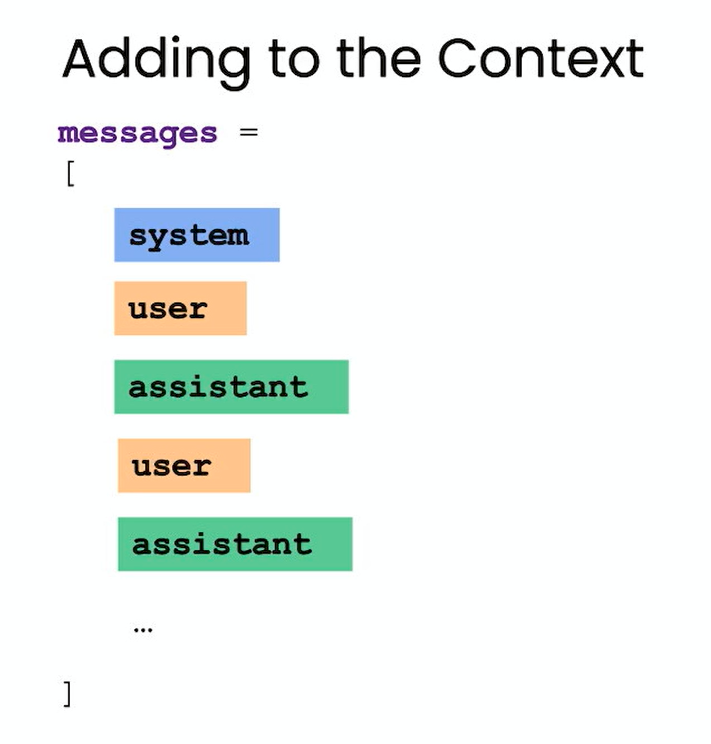